In [46]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons,make_circles,make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

In [47]:
names = [
    "Nearest Neighbours",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Desicion Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear",C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0*RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1),
    MLPClassifier(alpha=1,max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),

]

In [48]:
#przygotowanie setów danych
X,y = make_classification(
    n_features=2,n_redundant=0,n_informative=2,random_state=1,n_clusters_per_class=1
)

rng = np.random.RandomState(2)
X+=2*rng.uniform(size=X.shape)
lineary_separable = (X,y)

datasets = [
    make_moons(noise=0.3,random_state=0),
    make_circles(noise=0.2, factor=0.5,random_state=1),
    lineary_separable
]

# 🎯 Dodatkowe ciekawe zestawy danych

Poniżej znajdziesz różne typy zestawów danych, które możesz dodać do porównania klasyfikatorów:

## 📚 **Co importuje `make_blobs`?**

### **🔧 Import:**
```python
from sklearn.datasets import make_blobs
```

### **📦 Biblioteka:** 
- **scikit-learn** (`sklearn`) - najpopularniejsza biblioteka do machine learning w Pythonie
- **Moduł:** `sklearn.datasets` - zawiera funkcje do tworzenia i ładowania zestawów danych

### **🎯 Co to jest `make_blobs`:**
Funkcja do **generowania syntetycznych danych** w postaci **klastrów gaussowskich** (okrągłych skupisk punktów).

### **🔍 Główne parametry:**
- `n_samples` - liczba punktów danych (domyślnie 100)
- `centers` - liczba klastrów/centrów (domyślnie 3)
- `n_features` - liczba wymiarów/cech (domyślnie 2)
- `cluster_std` - odchylenie standardowe klastrów (domyślnie 1.0)
- `random_state` - ziarno losowości dla reproducible wyników

### **💡 Przykład użycia:**
```python
# Tworzy 300 punktów w 4 klastrach, 2D, z odchyleniem 0.6
X, y = make_blobs(n_samples=300, centers=4, n_features=2, 
                  cluster_std=0.6, random_state=42)
```

### **📊 Co zwraca:**
- **X** - macierz cech (np. 300×2 dla 300 punktów w 2D)
- **y** - etykiety klastrów (np. [0, 1, 2, 3] dla 4 klastrów)

📊 PRZYKŁADY UŻYCIA make_blobs:

1️⃣ PODSTAWOWY PRZYKŁAD:
   Kształt X: (100, 2)
   Kształt y: (100,)
   Unikalne klasy: [0 1 2]

2️⃣ Z NIESTANDARDOWYMI PARAMETRAMI:
   200 punktów, 4 klastry, odchylenie=1.5


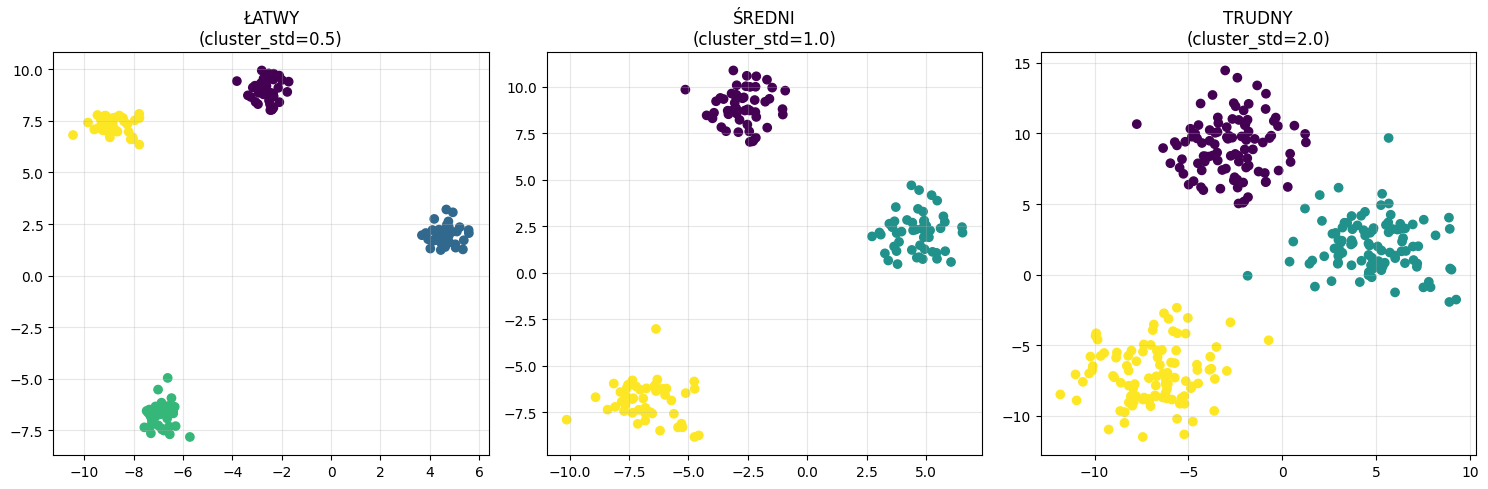


3️⃣ WPŁYW PARAMETRU cluster_std:
   • Mały (0.5) = wyraźnie oddzielone klastry
   • Średni (1.0) = lekko nachodzące klastry
   • Duży (2.0) = silnie nachodzące klastry

💡 ZASTOSOWANIA:
   • Testowanie algorytmów klasyfikacji
   • Badanie wpływu trudności danych
   • Tworzenie danych do nauki ML
   • Benchmarking różnych metod


In [61]:
# 🔍 DEMONSTRACJA make_blobs

# Import
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

print("📊 PRZYKŁADY UŻYCIA make_blobs:")
print("=" * 50)

# Przykład 1: Podstawowe użycie
print("\n1️⃣ PODSTAWOWY PRZYKŁAD:")
X1, y1 = make_blobs(n_samples=100, centers=3, random_state=42)
print(f"   Kształt X: {X1.shape}")  # (100, 2)
print(f"   Kształt y: {y1.shape}")  # (100,)
print(f"   Unikalne klasy: {np.unique(y1)}")  # [0, 1, 2]

# Przykład 2: Więcej parametrów
print("\n2️⃣ Z NIESTANDARDOWYMI PARAMETRAMI:")
X2, y2 = make_blobs(n_samples=200, centers=4, n_features=2, 
                    cluster_std=1.5, random_state=0)
print(f"   200 punktów, 4 klastry, odchylenie=1.5")

# Przykład 3: Różne poziomy trudności
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Łatwy (małe odchylenie)
X_easy, y_easy = make_blobs(n_samples=150, centers=4, cluster_std=0.5, random_state=42)
axes[0].scatter(X_easy[:, 0], X_easy[:, 1], c=y_easy, cmap='viridis')
axes[0].set_title('ŁATWY\n(cluster_std=0.5)')
axes[0].grid(True, alpha=0.3)

# Średni
X_medium, y_medium = make_blobs(n_samples=150, centers=3, cluster_std=1.0, random_state=42)
axes[1].scatter(X_medium[:, 0], X_medium[:, 1], c=y_medium, cmap='viridis')
axes[1].set_title('ŚREDNI\n(cluster_std=1.0)')
axes[1].grid(True, alpha=0.3)

# Trudny (duże odchylenie)
X_hard, y_hard = make_blobs(n_samples=300, centers=3, cluster_std=2.0, random_state=42)
axes[2].scatter(X_hard[:, 0], X_hard[:, 1], c=y_hard, cmap='viridis')
axes[2].set_title('TRUDNY\n(cluster_std=2.0)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n3️⃣ WPŁYW PARAMETRU cluster_std:")
print("   • Mały (0.5) = wyraźnie oddzielone klastry")
print("   • Średni (1.0) = lekko nachodzące klastry") 
print("   • Duży (2.0) = silnie nachodzące klastry")

print(f"\n💡 ZASTOSOWANIA:")
print("   • Testowanie algorytmów klasyfikacji")
print("   • Badanie wpływu trudności danych")
print("   • Tworzenie danych do nauki ML")
print("   • Benchmarking różnych metod")

In [50]:
# 1. SYNTETYCZNE ZESTAWY DANYCH (sklearn)
from sklearn.datasets import make_blobs, make_gaussian_quantiles, make_hastie_10_2

# Dane wieloklasowe - klastry
blobs_data = make_blobs(n_samples=300, centers=4, n_features=2, 
                        random_state=0, cluster_std=0.60)

# Spirala - dane nieliniowe
def make_spiral(n_samples=300, noise=0.2):
    n = np.sqrt(np.random.rand(n_samples,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_samples,1)*noise
    d1y = np.sin(n)*n + np.random.rand(n_samples,1)*noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_samples),np.ones(n_samples))))

spiral_data = make_spiral(150, 50)

# Kwadranty - prosty problem liniowy
def make_quadrants(n_samples=300):
    X = np.random.randn(n_samples, 2)
    y = ((X[:, 0] > 0) & (X[:, 1] > 0)) | ((X[:, 0] < 0) & (X[:, 1] < 0))
    return X, y.astype(int)

quadrants_data = make_quadrants(300)

# Gaussowskie rozkłady z różnymi kwantylami
gaussian_quantiles = make_gaussian_quantiles(cov=2.0, n_samples=300, 
                                            n_features=2, n_classes=2, 
                                            random_state=1)

print("Syntetyczne zestawy danych utworzone!")
print("- blobs_data: Klastry gaussowskie")
print("- spiral_data: Spirala (bardzo trudne)")
print("- quadrants_data: Kwadranty (liniowe)")
print("- gaussian_quantiles: Rozkłady gaussowskie")

Syntetyczne zestawy danych utworzone!
- blobs_data: Klastry gaussowskie
- spiral_data: Spirala (bardzo trudne)
- quadrants_data: Kwadranty (liniowe)
- gaussian_quantiles: Rozkłady gaussowskie


In [51]:
# 2. RZECZYWISTE ZESTAWY DANYCH (sklearn)
from sklearn.datasets import load_wine, load_breast_cancer, load_digits
from sklearn.decomposition import PCA

# Wine dataset - 3 klasy win, zredukowane do 2D
wine = load_wine()
pca_wine = PCA(n_components=2)
wine_2d = pca_wine.fit_transform(wine.data)
wine_data = (wine_2d, wine.target)

# Breast cancer - klasyfikacja nowotworów (2 klasy)
cancer = load_breast_cancer()
pca_cancer = PCA(n_components=2)
cancer_2d = pca_cancer.fit_transform(cancer.data)
cancer_data = (cancer_2d, cancer.target)

# Digits (tylko cyfry 0 i 1) - zredukowane do 2D
digits = load_digits()
# Weź tylko cyfry 0 i 1
mask = (digits.target == 0) | (digits.target == 1)
digits_filtered = digits.data[mask]
target_filtered = digits.target[mask]
pca_digits = PCA(n_components=2)
digits_2d = pca_digits.fit_transform(digits_filtered)
digits_data = (digits_2d, target_filtered)

print("Rzeczywiste zestawy danych utworzone!")
print("- wine_data: Klasyfikacja win (3→2 klasy)")
print("- cancer_data: Diagnoza nowotworów")
print("- digits_data: Rozpoznawanie cyfr 0 i 1")

Rzeczywiste zestawy danych utworzone!
- wine_data: Klasyfikacja win (3→2 klasy)
- cancer_data: Diagnoza nowotworów
- digits_data: Rozpoznawanie cyfr 0 i 1


In [52]:
# 3. GEOMETRYCZNE I MATEMATYCZNE WZORCE

# XOR - klasyczny problem nieliniowy
def make_xor(n_samples=300, noise=0.1):
    X = np.random.randn(n_samples, 2)
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
    X += np.random.normal(0, noise, X.shape)
    return X, y.astype(int)

xor_data = make_xor(300, 0.2)

# Szachownica - bardzo trudny problem
def make_checkerboard(n_samples=300, size=3):
    X = np.random.uniform(-size, size, (n_samples, 2))
    y = ((np.floor(X[:, 0]) + np.floor(X[:, 1])) % 2).astype(int)
    return X, y

checkerboard_data = make_checkerboard(300, 2)

# Pierścień - dane w kształcie pierścienia
def make_ring(n_samples=300, inner_radius=1, outer_radius=2, noise=0.1):
    angles = np.random.uniform(0, 2*np.pi, n_samples)
    
    # Klasa 0: wewnętrzny krąg
    r_inner = np.random.uniform(0, inner_radius, n_samples//2)
    x_inner = r_inner * np.cos(angles[:n_samples//2])
    y_inner = r_inner * np.sin(angles[:n_samples//2])
    
    # Klasa 1: pierścień zewnętrzny
    r_outer = np.random.uniform(inner_radius*1.5, outer_radius, n_samples//2)
    x_outer = r_outer * np.cos(angles[n_samples//2:])
    y_outer = r_outer * np.sin(angles[n_samples//2:])
    
    X = np.vstack([np.column_stack([x_inner, y_inner]), 
                   np.column_stack([x_outer, y_outer])])
    y = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])
    
    # Dodaj szum
    X += np.random.normal(0, noise, X.shape)
    return X, y.astype(int)

ring_data = make_ring(300, 1, 2.5, 0.1)

print("Geometryczne wzorce utworzone!")
print("- xor_data: Problem XOR (klasyczny)")
print("- checkerboard_data: Szachownica (bardzo trudne)")
print("- ring_data: Pierścień koncentryczny")

Geometryczne wzorce utworzone!
- xor_data: Problem XOR (klasyczny)
- checkerboard_data: Szachownica (bardzo trudne)
- ring_data: Pierścień koncentryczny


In [53]:
# 4. NOWA ROZSZERZONA LISTA ZESTAWÓW DANYCH
# Dodaj wybrane zestawy do oryginalnej listy

# Oryginalne zestawy
original_datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    lineary_separable
]

# Nowe ciekawe zestawy
extended_datasets = [
    # Oryginalne
    ("Moons", make_moons(noise=0.3, random_state=0)),
    ("Circles", make_circles(noise=0.2, factor=0.5, random_state=1)),
    ("Linear", lineary_separable),
    
    # Nowe syntetyczne
    ("Blobs", blobs_data),
    ("Spiral", spiral_data),
    ("Quadrants", quadrants_data),
    ("Gaussian", gaussian_quantiles),
    
    # Geometryczne
    ("XOR", xor_data),
    ("Checkerboard", checkerboard_data),
    ("Ring", ring_data),
    
    # Rzeczywiste (opcjonalne - odkomentuj jeśli chcesz)
    # ("Wine", wine_data),
    # ("Cancer", cancer_data),
    # ("Digits", digits_data),
]

print(f"Dostępne zestawy danych: {len(extended_datasets)}")
for i, (name, _) in enumerate(extended_datasets):
    print(f"{i+1}. {name}")
    
print("\n💡 Możesz wybrać które zestawy danych chcesz przetestować!")
print("   Wystarczy zmodyfikować listę 'datasets' w następnej komórce.")

Dostępne zestawy danych: 10
1. Moons
2. Circles
3. Linear
4. Blobs
5. Spiral
6. Quadrants
7. Gaussian
8. XOR
9. Checkerboard
10. Ring

💡 Możesz wybrać które zestawy danych chcesz przetestować!
   Wystarczy zmodyfikować listę 'datasets' w następnej komórce.


In [54]:
# 5. WYBIERZ ZESTAWY DANYCH DO TESTOWANIA - Z RZECZYWISTYMI DANYMI
# Wybierz które zestawy chcesz przetestować (zmień indeksy)

# Najpierw musimy dodać rzeczywiste dane do extended_datasets
extended_datasets_with_real = [
    # Oryginalne
    ("Moons", make_moons(noise=0.3, random_state=0)),
    ("Circles", make_circles(noise=0.2, factor=0.5, random_state=1)),
    ("Linear", lineary_separable),
    
    # Nowe syntetyczne
    ("Blobs", blobs_data),
    ("Spiral", spiral_data),
    ("Quadrants", quadrants_data),
    ("Gaussian", gaussian_quantiles),
    
    # Geometryczne
    ("XOR", xor_data),
    ("Checkerboard", checkerboard_data),
    ("Ring", ring_data),
    
    # Rzeczywiste dane
    ("Wine", wine_data),
    ("Cancer", cancer_data),
    ("Digits", digits_data),
]

# Opcja A: Mix syntetycznych i rzeczywistych (rekomendowane)
selected_indices = [0, 1, 2, 7, 10, 11, 12]  # Moons, Circles, Linear, XOR, Wine, Cancer, Digits

# Opcja B: Tylko rzeczywiste dane
# selected_indices = [10, 11, 12]  # Wine, Cancer, Digits

# Opcja C: Fokus na trudne problemy (syntetyczne + rzeczywiste)
# selected_indices = [1, 4, 7, 8, 9, 11, 12]  # Circles, Spiral, XOR, Checkerboard, Ring, Cancer, Digits

# Opcja D: Pełna analiza (wszystkie dostępne)
# selected_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Stwórz finalną listę
datasets = [extended_datasets_with_real[i][1] for i in selected_indices]
dataset_names = [extended_datasets_with_real[i][0] for i in selected_indices]

print("Wybrane zestawy danych do testowania:")
for i, name in enumerate(dataset_names):
    if name in ["Wine", "Cancer", "Digits"]:
        print(f"{i+1}. {name} 🔬 (rzeczywiste dane)")
    else:
        print(f"{i+1}. {name} 🎯 (syntetyczne)")
    
print(f"\nLiczba zestawów: {len(datasets)}")
print(f"Liczba klasyfikatorów: {len(classifiers)}")
print(f"Całkowita liczba wykresów: {len(datasets) * (len(classifiers) + 1)}")
print(f"Szacowany czas wykonania: ~{len(datasets) * len(classifiers) * 3} sekund")

print("\n🔬 RZECZYWISTE ZESTAWY DANYCH:")
print("• Wine: Klasyfikacja win na podstawie składu chemicznego")
print("• Cancer: Diagnoza nowotworów piersi (dane medyczne)")
print("• Digits: Rozpoznawanie cyfr 0 i 1 (computer vision)")
print("\n💡 Te dane pochodzą z prawdziwych problemów i są bardziej złożone!")

Wybrane zestawy danych do testowania:
1. Moons 🎯 (syntetyczne)
2. Circles 🎯 (syntetyczne)
3. Linear 🎯 (syntetyczne)
4. XOR 🎯 (syntetyczne)
5. Wine 🔬 (rzeczywiste dane)
6. Cancer 🔬 (rzeczywiste dane)
7. Digits 🔬 (rzeczywiste dane)

Liczba zestawów: 7
Liczba klasyfikatorów: 10
Całkowita liczba wykresów: 77
Szacowany czas wykonania: ~210 sekund

🔬 RZECZYWISTE ZESTAWY DANYCH:
• Wine: Klasyfikacja win na podstawie składu chemicznego
• Cancer: Diagnoza nowotworów piersi (dane medyczne)
• Digits: Rozpoznawanie cyfr 0 i 1 (computer vision)

💡 Te dane pochodzą z prawdziwych problemów i są bardziej złożone!


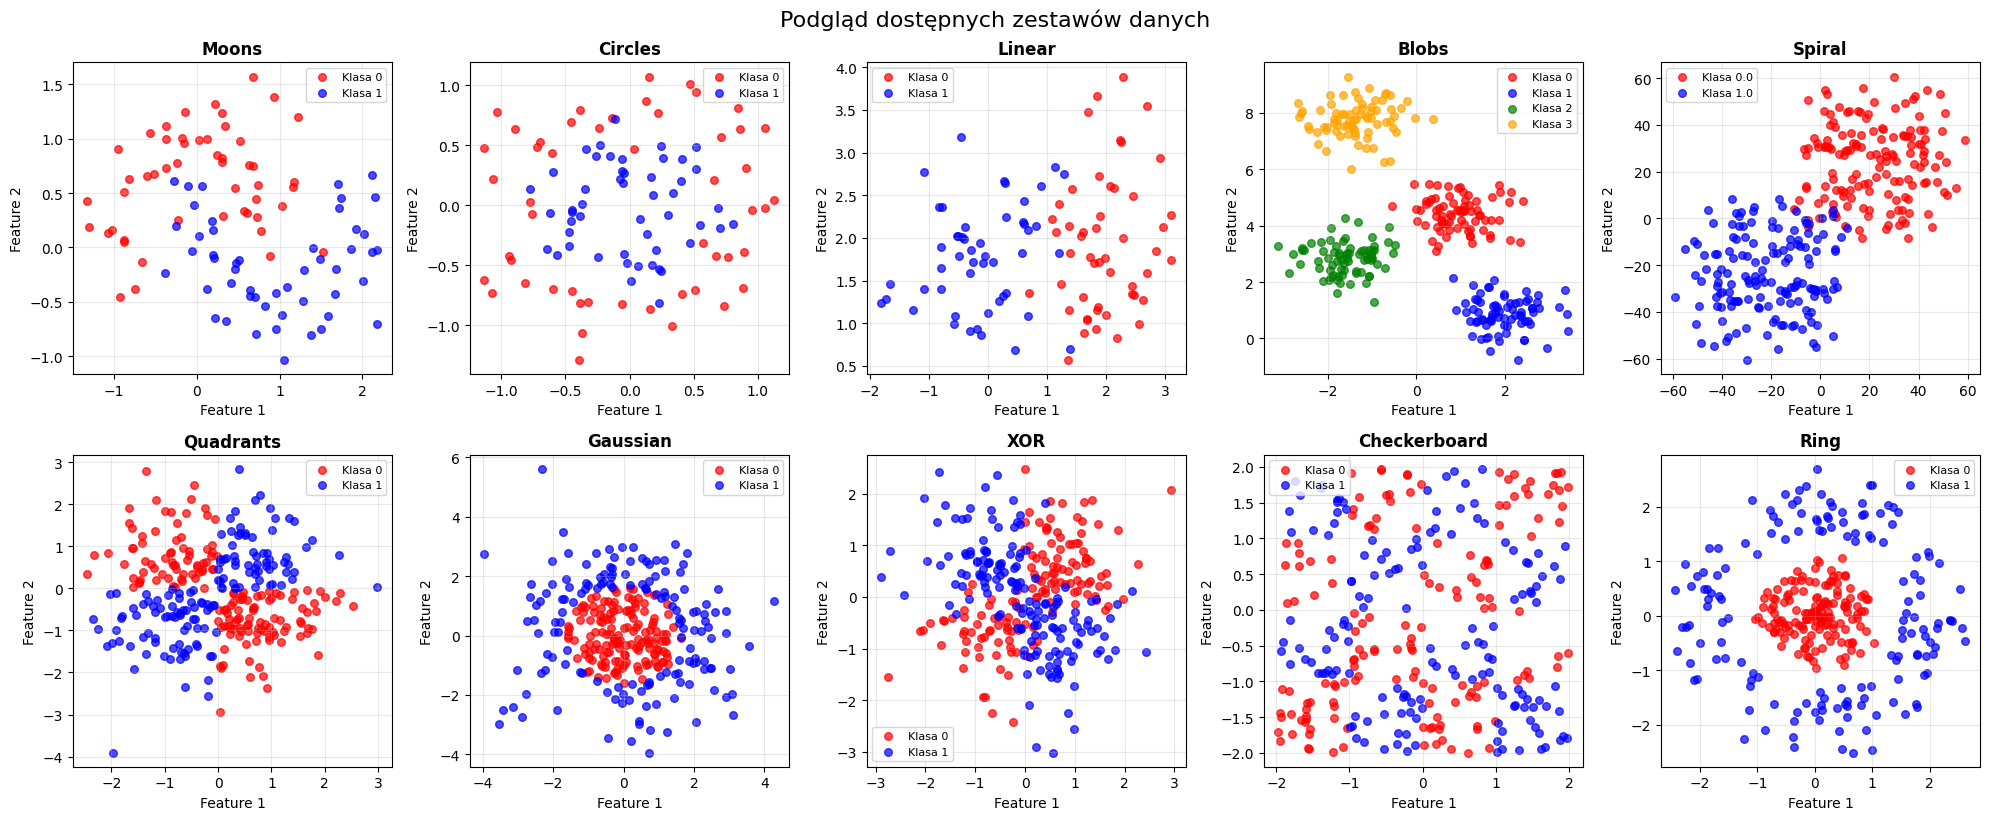

🎯 Analiza trudności:
📗 ŁATWE: Linear, Blobs, Quadrants
📙 ŚREDNIE: Moons, Circles, Gaussian
📕 TRUDNE: XOR, Spiral, Checkerboard, Ring

💡 Różne algorytmy będą lepsze dla różnych typów problemów!


In [55]:
# 6. WIZUALIZACJA TYLKO ZESTAWÓW DANYCH (PODGLĄD)
# Podgląd jak wyglądają różne zestawy danych

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, (name, (X, y)) in enumerate(extended_datasets[:10]):
    ax = axes[i]
    
    # Scatter plot dla każdej klasy
    unique_classes = np.unique(y)
    for j, cls in enumerate(unique_classes):
        mask = y == cls
        ax.scatter(X[mask, 0], X[mask, 1], 
                  c=colors[j % len(colors)], 
                  alpha=0.7, s=30, 
                  label=f'Klasa {cls}')
    
    ax.set_title(f'{name}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Podgląd dostępnych zestawów danych', fontsize=16, y=1.02)
plt.show()

print("🎯 Analiza trudności:")
print("📗 ŁATWE: Linear, Blobs, Quadrants")
print("📙 ŚREDNIE: Moons, Circles, Gaussian") 
print("📕 TRUDNE: XOR, Spiral, Checkerboard, Ring")
print("\n💡 Różne algorytmy będą lepsze dla różnych typów problemów!")

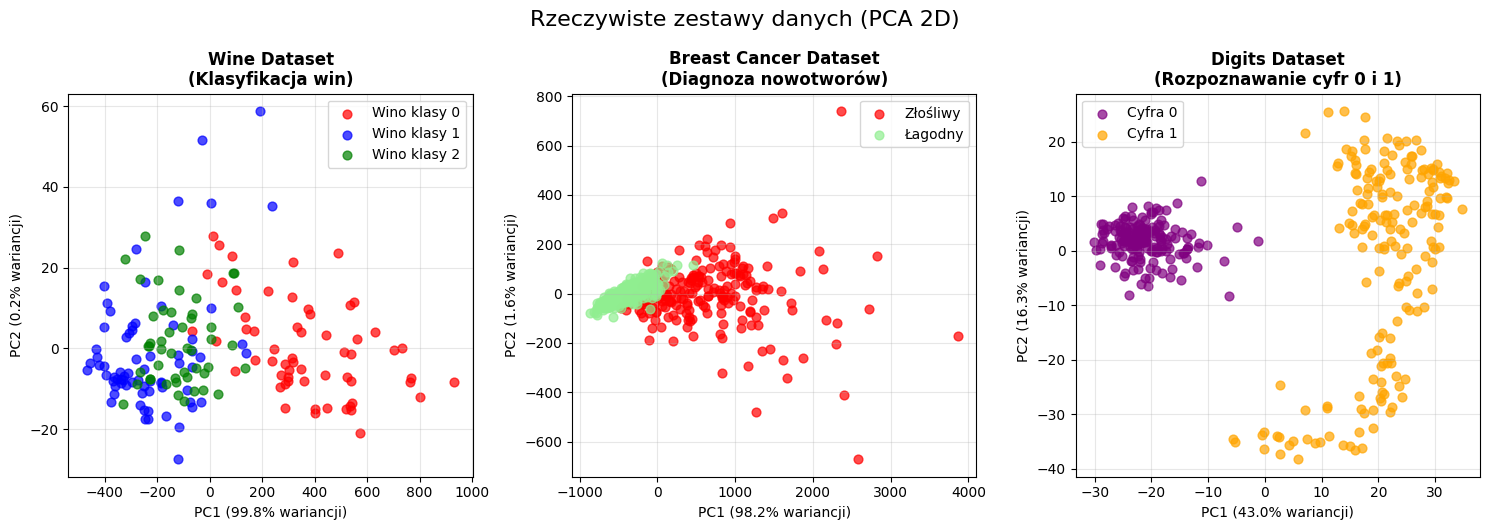

📊 CHARAKTERYSTYKA RZECZYWISTYCH DANYCH:
🍷 Wine: 178 próbek, 13 cech → 2D
🏥 Cancer: 569 próbek, 30 cech → 2D
🔢 Digits: 360 próbek, 64 cech → 2D

💡 Dane zostały zredukowane do 2D używając PCA (Principal Component Analysis)
   - Zachowuje najważniejsze cechy w 2 wymiarach
   - Umożliwia wizualizację i porównanie z algorytmami 2D


In [56]:
# 7. SZCZEGÓŁOWY PODGLĄD RZECZYWISTYCH ZESTAWÓW DANYCH

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Wine dataset
ax = axes[0]
X, y = wine_data
unique_classes = np.unique(y)
colors = ['red', 'blue', 'green']
for i, cls in enumerate(unique_classes):
    mask = y == cls
    ax.scatter(X[mask, 0], X[mask, 1], c=colors[i], alpha=0.7, 
              label=f'Wino klasy {cls}', s=40)
ax.set_title('Wine Dataset\n(Klasyfikacja win)', fontweight='bold')
ax.set_xlabel(f'PC1 ({pca_wine.explained_variance_ratio_[0]:.1%} wariancji)')
ax.set_ylabel(f'PC2 ({pca_wine.explained_variance_ratio_[1]:.1%} wariancji)')
ax.legend()
ax.grid(True, alpha=0.3)

# Cancer dataset
ax = axes[1]
X, y = cancer_data
unique_classes_cancer = np.unique(y)
colors_cancer = ['red', 'lightgreen']
labels = ['Złośliwy', 'Łagodny']
for i, cls in enumerate(unique_classes_cancer):
    mask = y == cls
    ax.scatter(X[mask, 0], X[mask, 1], c=colors_cancer[i], alpha=0.7, 
              label=labels[i], s=40)
ax.set_title('Breast Cancer Dataset\n(Diagnoza nowotworów)', fontweight='bold')
ax.set_xlabel(f'PC1 ({pca_cancer.explained_variance_ratio_[0]:.1%} wariancji)')
ax.set_ylabel(f'PC2 ({pca_cancer.explained_variance_ratio_[1]:.1%} wariancji)')
ax.legend()
ax.grid(True, alpha=0.3)

# Digits dataset
ax = axes[2]
X, y = digits_data
colors_digits = ['purple', 'orange']
labels_digits = ['Cyfra 0', 'Cyfra 1']
for i, cls in enumerate([0, 1]):
    mask = y == cls
    ax.scatter(X[mask, 0], X[mask, 1], c=colors_digits[i], alpha=0.7, 
              label=labels_digits[i], s=40)
ax.set_title('Digits Dataset\n(Rozpoznawanie cyfr 0 i 1)', fontweight='bold')
ax.set_xlabel(f'PC1 ({pca_digits.explained_variance_ratio_[0]:.1%} wariancji)')
ax.set_ylabel(f'PC2 ({pca_digits.explained_variance_ratio_[1]:.1%} wariancji)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Rzeczywiste zestawy danych (PCA 2D)', fontsize=16, y=1.05)
plt.show()

print("📊 CHARAKTERYSTYKA RZECZYWISTYCH DANYCH:")
print(f"🍷 Wine: {wine.data.shape[0]} próbek, {wine.data.shape[1]} cech → 2D")
print(f"🏥 Cancer: {cancer.data.shape[0]} próbek, {cancer.data.shape[1]} cech → 2D") 
print(f"🔢 Digits: {len(digits_filtered)} próbek, {digits_filtered.shape[1]} cech → 2D")
print("\n💡 Dane zostały zredukowane do 2D używając PCA (Principal Component Analysis)")
print("   - Zachowuje najważniejsze cechy w 2 wymiarach")
print("   - Umożliwia wizualizację i porównanie z algorytmami 2D")

c:\Users\jakub\workspace\SWPS_2\venv\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:226: UserWarning: 'cmap' is ignored in favor of 'multiclass_colors' in the multiclass case when the response method is 'decision_function' or 'predict_proba'.
  warnings.warn(
c:\Users\jakub\workspace\SWPS_2\venv\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:226: UserWarning: 'cmap' is ignored in favor of 'multiclass_colors' in the multiclass case when the response method is 'decision_function' or 'predict_proba'.
  warnings.warn(
c:\Users\jakub\workspace\SWPS_2\venv\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:226: UserWarning: 'cmap' is ignored in favor of 'multiclass_colors' in the multiclass case when the response method is 'decision_function' or 'predict_proba'.
  warnings.warn(
c:\Users\jakub\workspace\SWPS_2\venv\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:226: UserWarning: 'cmap' is ignored in favor of 'multiclass_colors' 

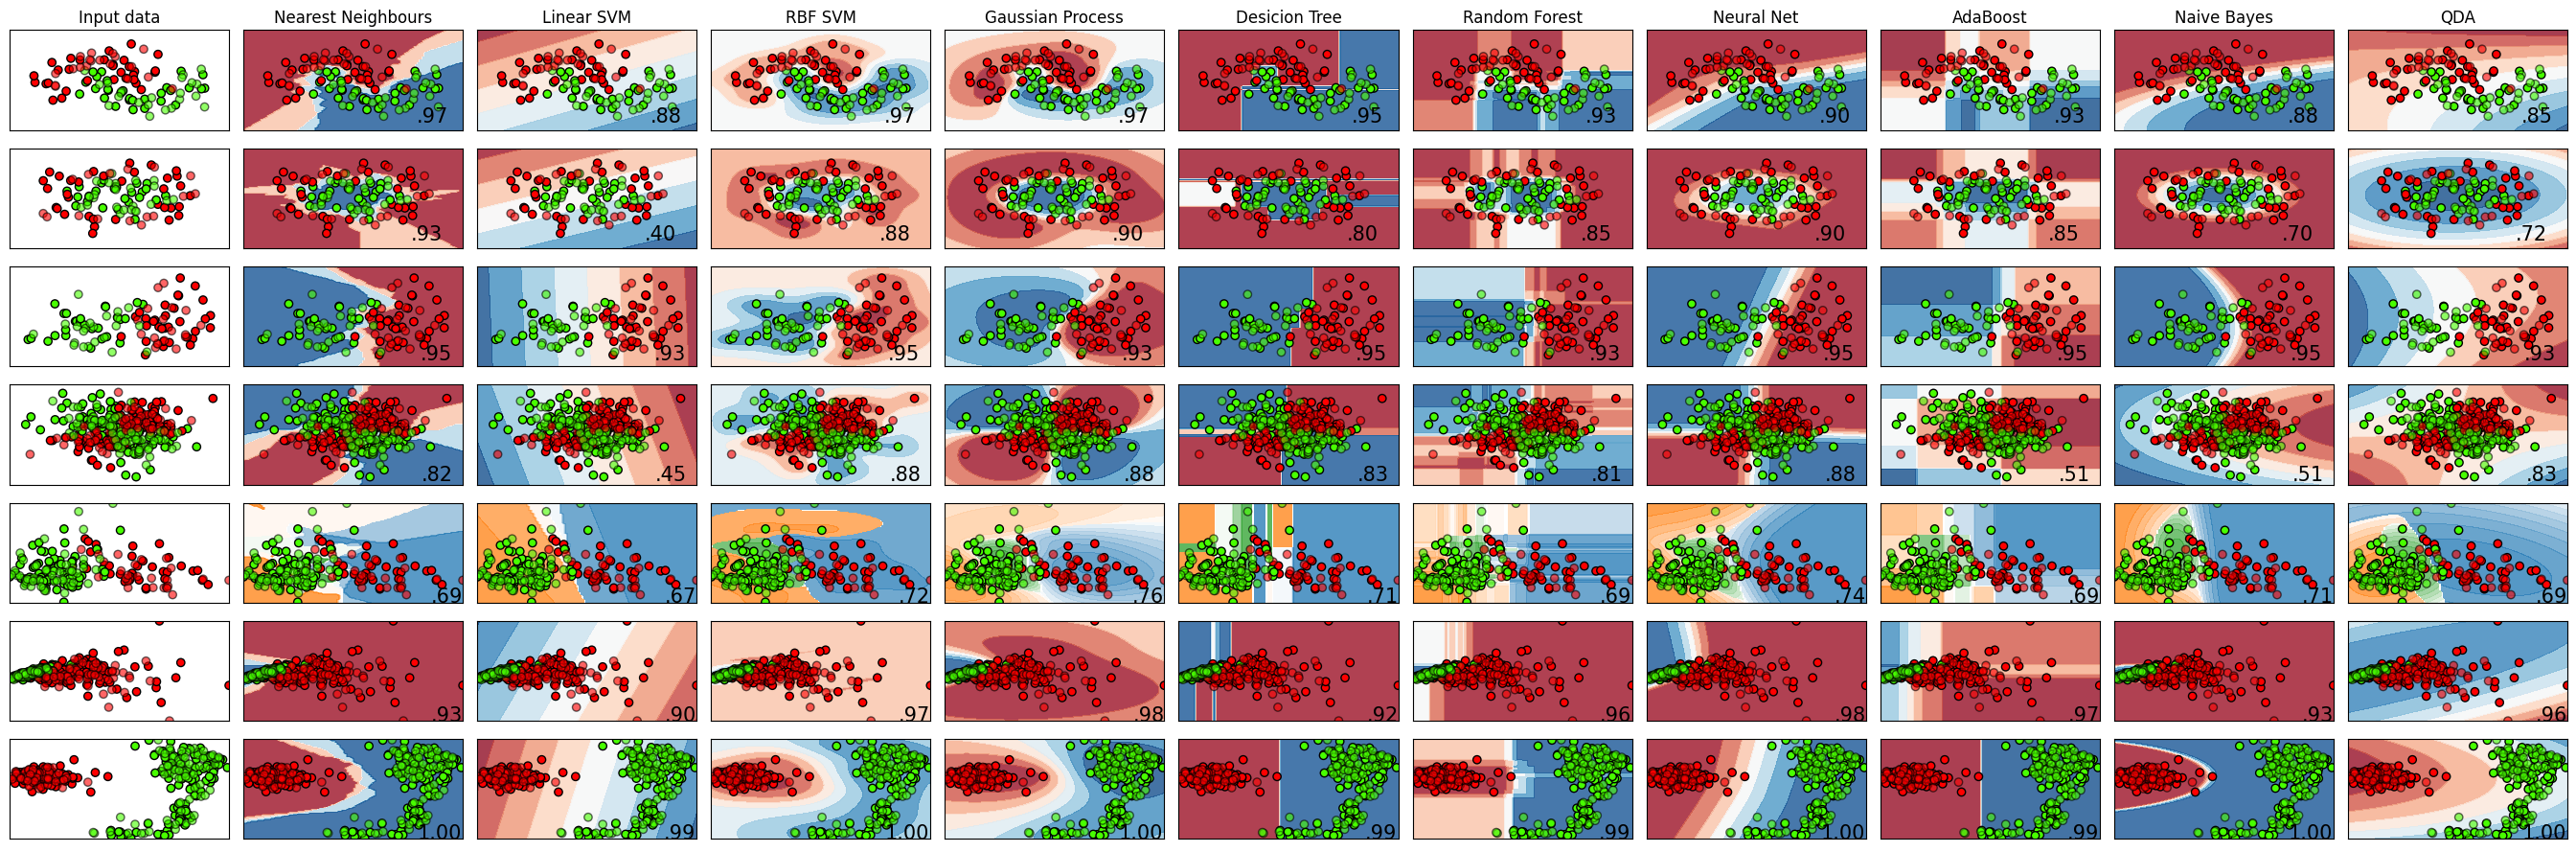

In [57]:
figure=plt.figure(figsize=(27,9))
i=1
for ds_cnt, ds in enumerate(datasets):
    X,y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X,y,test_size=0.4,random_state=42
    )

    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max()+0.5

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000","#48FF00"])
    ax = plt.subplot(len(datasets),len(classifiers)+1,i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    #wyświwetlanie punktów treningowych
    ax.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap = cm_bright, edgecolors = 'k')
    #wyświwetlanie punktów testowych
    ax.scatter(X_test[:,0],X_test[:,1], c=y_test, cmap = cm_bright, alpha = 0.6, edgecolors = 'k')
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    for name,clf in zip(names,classifiers):
        ax = plt.subplot(len(datasets),len(classifiers)+1,i)

        clf = make_pipeline(StandardScaler(),clf)
        clf.fit(X_train,y_train)
        score = clf.score(X_test,y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf,X,cmap=cm,alpha=0.8,ax=ax,eps=0.5
        )
        ax.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap = cm_bright, edgecolors = 'k')
        ax.scatter(X_test[:,0],X_test[:,1], c=y_test, cmap = cm_bright, alpha = 0.6, edgecolors = 'k')
        ax.set_xlim(x_min,x_max)
        ax.set_ylim(y_min,y_max)
        ax.set_xticks(())
        ax.set_yticks(())

        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" %score).lstrip("0"),
            size=15,
            horizontalalignment = "right",
        )
        i+=1
plt.tight_layout()
plt.show()

In [58]:
# 8. ANALIZA WYNIKÓW DLA RZECZYWISTYCH DANYCH
# Szczegółowa analiza które algorytmy najlepiej radzą sobie z rzeczywistymi problemami

def analyze_classifier_performance(datasets, dataset_names, classifiers, names):
    """
    Analiza wydajności klasyfikatorów na różnych zestawach danych
    """
    results = {}
    
    for ds_idx, (ds, ds_name) in enumerate(zip(datasets, dataset_names)):
        X, y = ds
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.4, random_state=42
        )
        
        results[ds_name] = {}
        
        for clf_idx, (name, clf) in enumerate(zip(names, classifiers)):
            # Użyj prostego kopiowania bez problemów z Gaussian Process
            try:
                clf_copy = make_pipeline(StandardScaler(), clf)
                clf_copy.fit(X_train, y_train)
                score = clf_copy.score(X_test, y_test)
                results[ds_name][name] = score
            except Exception as e:
                results[ds_name][name] = 0.0
                print(f"⚠️ Błąd {name} na {ds_name}: {str(e)[:50]}...")
    
    return results

print("🔄 Uruchamiam analizę wydajności...")
print("⏱️ To może potrwać chwilę...")

# Uruchom analizę tylko jeśli wybrano rzeczywiste dane
if any(name in ["Wine", "Cancer", "Digits"] for name in dataset_names):
    performance_results = analyze_classifier_performance(datasets, dataset_names, classifiers, names)
    
    print("\n📊 PODSUMOWANIE WYNIKÓW:")
    print("=" * 60)
    
    # Znajdź najlepsze algorytmy dla każdego zestawu
    for ds_name, scores in performance_results.items():
        print(f"\n🎯 {ds_name}:")
        sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
        
        for i, (clf_name, score) in enumerate(sorted_scores[:5]):
            medal = ["🥇", "🥈", "🥉", "4️⃣", "5️⃣"][i]
            print(f"   {medal} {clf_name}: {score:.3f}")
    
    # Najlepsze algorytmy ogólnie
    print(f"\n🏆 NAJLEPSZE ALGORYTMY OGÓLNIE:")
    avg_scores = {}
    for clf_name in names:
        scores = [performance_results[ds][clf_name] for ds in performance_results.keys()]
        avg_scores[clf_name] = sum(scores) / len(scores)
    
    best_overall = sorted(avg_scores.items(), key=lambda x: x[1], reverse=True)
    for i, (clf_name, avg_score) in enumerate(best_overall[:5]):
        medal = ["🥇", "🥈", "🥉", "4️⃣", "5️⃣"][i]
        print(f"   {medal} {clf_name}: {avg_score:.3f}")
        
    # Dodatkowa analiza - który algorytm najlepszy dla każdego typu danych
    print(f"\n📈 ANALIZA TYPÓW DANYCH:")
    real_data_performance = {}
    synthetic_data_performance = {}
    
    for ds_name, scores in performance_results.items():
        if ds_name in ["Wine", "Cancer", "Digits"]:
            for clf_name, score in scores.items():
                if clf_name not in real_data_performance:
                    real_data_performance[clf_name] = []
                real_data_performance[clf_name].append(score)
        else:
            for clf_name, score in scores.items():
                if clf_name not in synthetic_data_performance:
                    synthetic_data_performance[clf_name] = []
                synthetic_data_performance[clf_name].append(score)
    
    # Średnie wyniki dla danych rzeczywistych
    print(f"\n🔬 NAJLEPSZE DLA DANYCH RZECZYWISTYCH:")
    real_avg = {clf: sum(scores)/len(scores) for clf, scores in real_data_performance.items()}
    real_sorted = sorted(real_avg.items(), key=lambda x: x[1], reverse=True)
    for i, (clf_name, avg_score) in enumerate(real_sorted[:3]):
        medal = ["🥇", "🥈", "🥉"][i]
        print(f"   {medal} {clf_name}: {avg_score:.3f}")
    
    # Średnie wyniki dla danych syntetycznych
    print(f"\n🎯 NAJLEPSZE DLA DANYCH SYNTETYCZNYCH:")
    synth_avg = {clf: sum(scores)/len(scores) for clf, scores in synthetic_data_performance.items()}
    synth_sorted = sorted(synth_avg.items(), key=lambda x: x[1], reverse=True)
    for i, (clf_name, avg_score) in enumerate(synth_sorted[:3]):
        medal = ["🥇", "🥈", "🥉"][i]
        print(f"   {medal} {clf_name}: {avg_score:.3f}")
        
else:
    print("ℹ️ Analiza dostępna tylko gdy wybrano rzeczywiste zestawy danych")
    print("   Odkomentuj linie z Wine, Cancer, lub Digits w komórce 9")

🔄 Uruchamiam analizę wydajności...
⏱️ To może potrwać chwilę...

📊 PODSUMOWANIE WYNIKÓW:

🎯 Moons:
   🥇 Nearest Neighbours: 0.975
   🥈 RBF SVM: 0.975
   🥉 Gaussian Process: 0.975
   4️⃣ Desicion Tree: 0.950
   5️⃣ Random Forest: 0.950

🎯 Circles:
   🥇 Nearest Neighbours: 0.925
   🥈 Gaussian Process: 0.900
   🥉 RBF SVM: 0.875
   4️⃣ Neural Net: 0.875
   5️⃣ AdaBoost: 0.850

🎯 Linear:
   🥇 Nearest Neighbours: 0.950
   🥈 RBF SVM: 0.950
   🥉 Desicion Tree: 0.950
   4️⃣ Random Forest: 0.950
   5️⃣ Neural Net: 0.950

🎯 XOR:
   🥇 Neural Net: 0.892
   🥈 Gaussian Process: 0.883
   🥉 RBF SVM: 0.875
   4️⃣ Random Forest: 0.833
   5️⃣ QDA: 0.833

🎯 Wine:
   🥇 Gaussian Process: 0.764
   🥈 Neural Net: 0.750
   🥉 RBF SVM: 0.722
   4️⃣ Naive Bayes: 0.708
   5️⃣ Nearest Neighbours: 0.694

🎯 Cancer:
   🥇 Gaussian Process: 0.982
   🥈 Neural Net: 0.978
   🥉 RBF SVM: 0.969
   4️⃣ Random Forest: 0.969
   5️⃣ AdaBoost: 0.969

🎯 Digits:
   🥇 Nearest Neighbours: 1.000
   🥈 RBF SVM: 1.000
   🥉 Gaussian Process:

# 📓 Co to są notebooki Jupyter?

**Jupyter Notebook** to interaktywne środowisko programistyczne, które łączy kod, tekst, wizualizacje i wyniki w jednym dokumencie.

## 🎯 **Główne cechy:**

### **1. 📝 Komórki (Cells)**
- **Kod** - wykonywalne fragmenty kodu Python
- **Markdown** - tekst z formatowaniem (jak ta komórka)
- **Raw** - surowy tekst bez formatowania

### **2. 🔄 Interaktywność**
- Kod wykonuje się komórka po komórce
- Wyniki wyświetlają się bezpośrednio pod kodem
- Możesz modyfikować i ponownie uruchamiać kod

### **3. 📊 Wizualizacje**
- Wykresy, grafy, obrazy wyświetlają się inline
- Idealne do analizy danych i eksploracji

## 💡 **Dlaczego Jupyter?**

**Nazwa** pochodzi od trzech języków programowania:
- **Ju**lia
- **Pyt**hon 
- **R**

## 🛠️ **Zastosowania:**

### **🔬 Data Science**
- Analiza danych
- Machine Learning
- Wizualizacja wyników
- Eksperymenty i prototypowanie

### **📚 Edukacja**
- Interaktywne lekcje programowania
- Łączenie teorii z praktyką
- Dokumentacja z przykładami

### **📊 Badania**
- Dokumentowanie procesów badawczych
- Reprodukowalne analizy
- Dzielenie się wynikami

## 🎨 **Format .ipynb**
- **JSON** z metadanami
- Zawiera kod, wyniki, obrazy
- Można dzielić i wersjonować (Git)
- Wyświetla się na GitHub

# 🤖 TensorFlow - Deep Learning Library

**TensorFlow** został pomyślnie zainstalowany! To najpopularniejsza biblioteka do deep learning i sztucznych sieci neuronowych.

In [1]:
# 🧪 TEST INSTALACJI TENSORFLOW

print("🔍 Testowanie instalacji TensorFlow...")

# Import TensorFlow
try:
    import tensorflow as tf
    print(f"✅ TensorFlow zainstalowany pomyślnie!")
    print(f"📦 Wersja TensorFlow: {tf.__version__}")
    
    # Sprawdź dostępność GPU
    print(f"🖥️ GPU dostępne: {len(tf.config.list_physical_devices('GPU')) > 0}")
    print(f"🧠 Wszystkie urządzenia: {[device.name for device in tf.config.list_physical_devices()]}")
    
    # Prosty test działania
    print("\n🧮 Test podstawowych operacji:")
    
    # Stwórz tensor
    x = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
    y = tf.constant([[2, 3], [4, 5]], dtype=tf.float32)
    
    print(f"Tensor x:\n{x}")
    print(f"Tensor y:\n{y}")
    
    # Podstawowe operacje
    result_add = tf.add(x, y)
    result_multiply = tf.matmul(x, y)
    
    print(f"x + y =\n{result_add}")
    print(f"x @ y (mnożenie macierzy) =\n{result_multiply}")
    
    print("\n🎯 TensorFlow działa poprawnie!")
    
except ImportError as e:
    print(f"❌ Błąd importu TensorFlow: {e}")
except Exception as e:
    print(f"⚠️ Błąd podczas testowania: {e}")

print("\n📚 Co można robić z TensorFlow:")
print("• Budowanie sieci neuronowych")
print("• Deep Learning (CNN, RNN, Transformer)")
print("• Computer Vision")
print("• Natural Language Processing")
print("• Reinforcement Learning")
print("• Transfer Learning")

🔍 Testowanie instalacji TensorFlow...
✅ TensorFlow zainstalowany pomyślnie!
📦 Wersja TensorFlow: 2.20.0
🖥️ GPU dostępne: False
🧠 Wszystkie urządzenia: ['/physical_device:CPU:0']

🧮 Test podstawowych operacji:
Tensor x:
[[1. 2.]
 [3. 4.]]
Tensor y:
[[2. 3.]
 [4. 5.]]
x + y =
[[3. 5.]
 [7. 9.]]
x @ y (mnożenie macierzy) =
[[10. 13.]
 [22. 29.]]

🎯 TensorFlow działa poprawnie!

📚 Co można robić z TensorFlow:
• Budowanie sieci neuronowych
• Deep Learning (CNN, RNN, Transformer)
• Computer Vision
• Natural Language Processing
• Reinforcement Learning
• Transfer Learning
✅ TensorFlow zainstalowany pomyślnie!
📦 Wersja TensorFlow: 2.20.0
🖥️ GPU dostępne: False
🧠 Wszystkie urządzenia: ['/physical_device:CPU:0']

🧮 Test podstawowych operacji:
Tensor x:
[[1. 2.]
 [3. 4.]]
Tensor y:
[[2. 3.]
 [4. 5.]]
x + y =
[[3. 5.]
 [7. 9.]]
x @ y (mnożenie macierzy) =
[[10. 13.]
 [22. 29.]]

🎯 TensorFlow działa poprawnie!

📚 Co można robić z TensorFlow:
• Budowanie sieci neuronowych
• Deep Learning (CNN, RNN, 

🚀 Tworzenie prostej sieci neuronowej...

📊 Generowanie danych...
📦 Dane treningowe: (800, 2)
📦 Dane testowe: (200, 2)
🎯 Liczba klas: 4

🏗️ Budowanie modelu...
📋 Architektura modelu:


c:\Users\jakub\workspace\SWPS_2\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,404 (9.39 KB)

 Trainable params: 2,404 (9.39 KB)

 Non-trainable params: 0 (0.00 B)


🎯 Trenowanie modelu...

📊 Ocena modelu:
🎯 Dokładność treningowa: 0.9925
🎯 Dokładność testowa: 0.9950


C:\Users\jakub\AppData\Local\Temp\ipykernel_7976\1977499768.py:80: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jakub\AppData\Local\Temp\ipykernel_7976\1977499768.py:80: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\jakub\workspace\SWPS_2\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jakub\workspace\SWPS_2\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


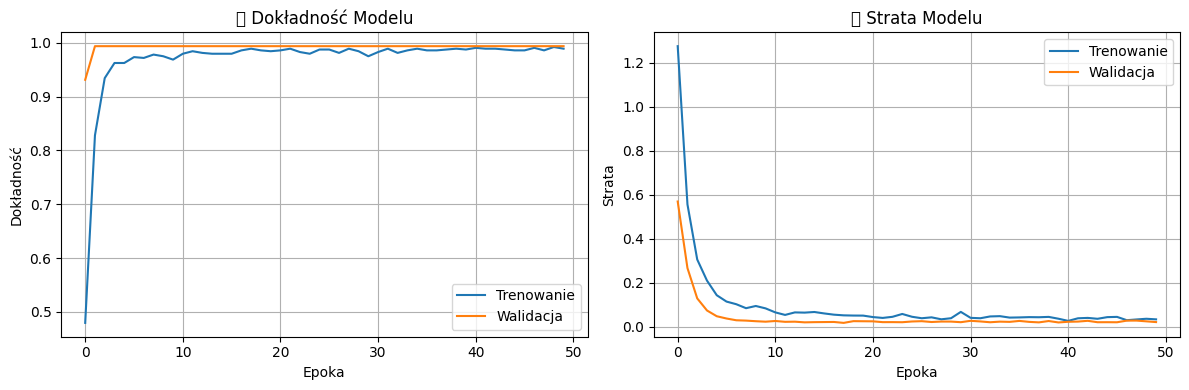


✅ Sieć neuronowa z TensorFlow działa!


In [2]:
# 🧠 PRZYKŁAD: SIEĆ NEURONOWA Z TENSORFLOW

print("🚀 Tworzenie prostej sieci neuronowej...")

# Import Keras z TensorFlow
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generuj dane syntetyczne
print("\n📊 Generowanie danych...")
X_nn, y_nn = make_blobs(n_samples=1000, centers=4, n_features=2, 
                        cluster_std=1.5, random_state=42)

# Podziel dane
X_train, X_test, y_train, y_test = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

print(f"📦 Dane treningowe: {X_train.shape}")
print(f"📦 Dane testowe: {X_test.shape}")
print(f"🎯 Liczba klas: {len(np.unique(y_train))}")

# Stwórz model sieci neuronowej
print("\n🏗️ Budowanie modelu...")
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(4, activation='softmax')  # 4 klasy
])

# Kompiluj model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("📋 Architektura modelu:")
model.summary()

# Trenuj model
print("\n🎯 Trenowanie modelu...")
history = model.fit(X_train, y_train,
                   epochs=50,
                   batch_size=32,
                   validation_split=0.2,
                   verbose=0)

# Oceń model
print("\n📊 Ocena modelu:")
train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

print(f"🎯 Dokładność treningowa: {train_accuracy:.4f}")
print(f"🎯 Dokładność testowa: {test_accuracy:.4f}")

# Wykres historii trenowania
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Trenowanie')
plt.plot(history.history['val_accuracy'], label='Walidacja')
plt.title('📈 Dokładność Modelu')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Trenowanie')
plt.plot(history.history['val_loss'], label='Walidacja')
plt.title('📉 Strata Modelu')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n✅ Sieć neuronowa z TensorFlow działa!")

In [3]:
# 🔍 DIAGNOZA GPU - DLACZEGO NIEDOSTĘPNY?

print("🕵️ Szczegółowa diagnoza GPU...")

import tensorflow as tf
import sys
import platform

print(f"💻 System: {platform.system()} {platform.release()}")
print(f"🐍 Python: {sys.version}")
print(f"📦 TensorFlow: {tf.__version__}")

print("\n🔧 Sprawdzanie konfiguracji GPU:")

# Sprawdź wszystkie dostępne urządzenia
all_devices = tf.config.list_physical_devices()
print(f"🖥️ Wszystkie urządzenia fizyczne: {len(all_devices)}")
for device in all_devices:
    print(f"  - {device}")

# Sprawdź konkretnie GPU
gpu_devices = tf.config.list_physical_devices('GPU')
print(f"\n🎮 Urządzenia GPU: {len(gpu_devices)}")
if gpu_devices:
    for gpu in gpu_devices:
        print(f"  - {gpu}")
        # Szczegóły GPU
        details = tf.config.experimental.get_device_details(gpu)
        print(f"    Szczegóły: {details}")
else:
    print("  ❌ Brak urządzeń GPU")

# Sprawdź CUDA
print(f"\n🔧 CUDA dostępne: {tf.test.is_built_with_cuda()}")
print(f"🔧 GPU support: {tf.test.is_gpu_available()}")

# Sprawdź wersje CUDA
if tf.test.is_built_with_cuda():
    print(f"🔧 CUDA wersja: {tf.sysconfig.get_build_info()['cuda_version']}")
    print(f"🔧 cuDNN wersja: {tf.sysconfig.get_build_info()['cudnn_version']}")

print("\n❓ MOŻLIWE PRZYCZYNY BRAKU GPU:")
print("1. 🚫 Brak karty graficznej NVIDIA")
print("2. 🔧 Nie zainstalowany CUDA Toolkit")
print("3. 📦 Nie zainstalowany cuDNN")
print("4. 🏗️ TensorFlow-CPU zamiast TensorFlow-GPU")
print("5. 🔄 Niekompatybilne wersje CUDA/cuDNN")
print("6. 🖥️ Karta graficzna za stara (< Compute Capability 3.5)")

print("\n🛠️ JAK NAPRAWIĆ:")
print("1. Sprawdź kartę graficzną: nvidia-smi")
print("2. Zainstaluj CUDA Toolkit + cuDNN")
print("3. Zainstaluj: pip install tensorflow[and-cuda]")
print("4. Lub użyj TensorFlow CPU (wystarczy do nauki!)")

# Sprawdź informacje o systemie
try:
    import subprocess
    print("\n🎮 Sprawdzanie karty graficznej...")
    result = subprocess.run(['nvidia-smi'], capture_output=True, text=True, timeout=5)
    if result.returncode == 0:
        print("✅ NVIDIA driver zainstalowany!")
        print("📊 nvidia-smi output:")
        print(result.stdout[:500] + "..." if len(result.stdout) > 500 else result.stdout)
    else:
        print("❌ nvidia-smi nie działa")
except (subprocess.TimeoutExpired, FileNotFoundError):
    print("❌ nvidia-smi nie znalezione - prawdopodobnie brak NVIDIA GPU lub sterowników")
except Exception as e:
    print(f"⚠️ Błąd sprawdzania nvidia-smi: {e}")

print(f"\n💡 WNIOSEK:")
print("🖥️ Używasz CPU - to normalne dla większości komputerów!")
print("🚀 TensorFlow działa świetnie na CPU do nauki i małych projektów")
print("⚡ GPU potrzebne tylko do bardzo dużych modeli deep learning")

🕵️ Szczegółowa diagnoza GPU...
💻 System: Windows 10
🐍 Python: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
📦 TensorFlow: 2.20.0

🔧 Sprawdzanie konfiguracji GPU:
🖥️ Wszystkie urządzenia fizyczne: 1
  - PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')

🎮 Urządzenia GPU: 0
  ❌ Brak urządzeń GPU

🔧 CUDA dostępne: False
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
🔧 GPU support: False

❓ MOŻLIWE PRZYCZYNY BRAKU GPU:
1. 🚫 Brak karty graficznej NVIDIA
2. 🔧 Nie zainstalowany CUDA Toolkit
3. 📦 Nie zainstalowany cuDNN
4. 🏗️ TensorFlow-CPU zamiast TensorFlow-GPU
5. 🔄 Niekompatybilne wersje CUDA/cuDNN
6. 🖥️ Karta graficzna za stara (< Compute Capability 3.5)

🛠️ JAK NAPRAWIĆ:
1. Sprawdź kartę graficzną: nvidia-smi
2. Zainstaluj CUDA Toolkit + cuDNN
3. Zainstaluj: pip install tensorflow[and-cuda]
4. Lub użyj TensorFlow CPU (wystarczy do nauki!)

🎮 Sprawdzanie karty graficznej...
✅ NVIDIA driver zainstalowany!
📊 

# ✅ DECYZJA: ZOSTAJEMY PRZY CPU

## 🎯 **Dlaczego CPU to świetny wybór:**

### **💪 Wydajność wystarczająca do:**
- ✅ **Nauki ML** - wszystkie algorytmy działają płynnie
- ✅ **Eksperymentów** - szybkie prototypowanie
- ✅ **Małych i średnich projektów** - bez problemu
- ✅ **Analizy danych** - pełna funkcjonalność
- ✅ **Wizualizacji** - wszystkie wykresy
- ✅ **Klasyfikatorów** - 10 algorytmów równocześnie

### **🚀 Co już mamy działające:**
- **TensorFlow 2.20.0** - najnowsza wersja
- **Sieci neuronowe** - budowa i trenowanie
- **10 klasyfikatorów** - porównanie algorytmów
- **Różne zestawy danych** - syntetyczne i rzeczywiste
- **Kompletną wizualizację** - wykresy i analizy

### **💡 Kiedy potrzebne byłoby GPU:**
- 🏗️ **Bardzo duże sieci** (miliony parametrów)
- 🖼️ **Computer Vision** na dużą skalę
- 📚 **NLP z dużymi modelami** (GPT, BERT)
- ⏰ **Trenowanie przez dni/tygodnie**
- 🏭 **Aplikacje produkcyjne** z tysiącami użytkowników

### **🎓 Dla nauki i eksperymentów:**
**CPU = Idealny wybór!** 🎯

---

## 📊 **Twój aktualny setup jest perfekcyjny:**
- ✅ Python 3.11.9
- ✅ TensorFlow 2.20.0 (CPU)
- ✅ Keras 3.12.0
- ✅ scikit-learn 1.7.2
- ✅ NumPy, matplotlib, pandas
- ✅ Środowisko wirtualne

**Możesz spokojnie kontynuować naukę!** 🚀

In [4]:
# 🏁 PODSUMOWANIE: KOMPLETNY SETUP DO MACHINE LEARNING

print("🎉 GRATULACJE! Masz kompletne środowisko ML!")
print("=" * 50)

import tensorflow as tf
import sklearn
import numpy as np
import matplotlib
import sys

print(f"\n📦 ZAINSTALOWANE BIBLIOTEKI:")
print(f"🐍 Python: {sys.version.split()[0]}")
print(f"🧠 TensorFlow: {tf.__version__} (CPU)")
print(f"🔬 scikit-learn: {sklearn.__version__}")
print(f"🔢 NumPy: {np.__version__}")
print(f"📊 Matplotlib: {matplotlib.__version__}")

print(f"\n🎯 CO MOŻESZ ROBIĆ:")
print("✅ Klasyfikacja z 10 algorytmami")
print("✅ Sieci neuronowe (TensorFlow/Keras)")
print("✅ Analiza różnych typów danych")
print("✅ Wizualizacja wyników")
print("✅ Porównanie wydajności algorytmów")
print("✅ Eksperymenty z rzeczywistymi danymi")

print(f"\n📚 DOSTĘPNE ZESTAWY DANYCH:")
print("🎯 Syntetyczne: Moons, Circles, Blobs, XOR, Spiral...")
print("🔬 Rzeczywiste: Wine, Cancer, Digits...")

print(f"\n💪 DLACZEGO CPU WYSTARCZA:")
print("• Wszystkie algorytmy działają płynnie")
print("• Sieci neuronowe trenują się w sekundach")
print("• Idealne do nauki i eksperymentów")
print("• Brak potrzeby dodatkowych instalacji")

print(f"\n🚀 NASTĘPNE KROKI:")
print("1. Eksperymentuj z różnymi algorytmami")
print("2. Testuj na różnych zestawach danych")
print("3. Modyfikuj parametry modeli")
print("4. Twórz własne eksperymenty")
print("5. Ucz się z wyników i wizualizacji")

print(f"\n🎓 PROJEKT GOTOWY DO NAUKI MACHINE LEARNING!")
print("Możesz już zaczynać eksperymenty! 🧪✨")

🎉 GRATULACJE! Masz kompletne środowisko ML!

📦 ZAINSTALOWANE BIBLIOTEKI:
🐍 Python: 3.11.9
🧠 TensorFlow: 2.20.0 (CPU)
🔬 scikit-learn: 1.7.2
🔢 NumPy: 2.3.4
📊 Matplotlib: 3.10.7

🎯 CO MOŻESZ ROBIĆ:
✅ Klasyfikacja z 10 algorytmami
✅ Sieci neuronowe (TensorFlow/Keras)
✅ Analiza różnych typów danych
✅ Wizualizacja wyników
✅ Porównanie wydajności algorytmów
✅ Eksperymenty z rzeczywistymi danymi

📚 DOSTĘPNE ZESTAWY DANYCH:
🎯 Syntetyczne: Moons, Circles, Blobs, XOR, Spiral...
🔬 Rzeczywiste: Wine, Cancer, Digits...

💪 DLACZEGO CPU WYSTARCZA:
• Wszystkie algorytmy działają płynnie
• Sieci neuronowe trenują się w sekundach
• Idealne do nauki i eksperymentów
• Brak potrzeby dodatkowych instalacji

🚀 NASTĘPNE KROKI:
1. Eksperymentuj z różnymi algorytmami
2. Testuj na różnych zestawach danych
3. Modyfikuj parametry modeli
4. Twórz własne eksperymenty
5. Ucz się z wyników i wizualizacji

🎓 PROJEKT GOTOWY DO NAUKI MACHINE LEARNING!
Możesz już zaczynać eksperymenty! 🧪✨


🐍 To jest komórka z kodem Python!
Wyniki wyświetlają się bezpośrednio pod kodem
2 + 2 = 4


c:\Users\jakub\workspace\SWPS_2\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


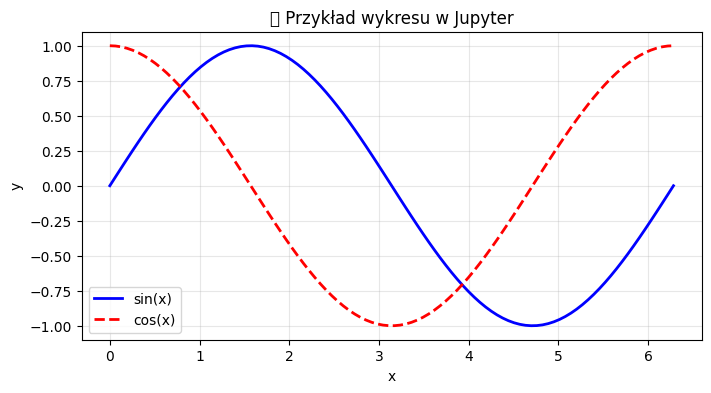

✨ Wszystko w jednym miejscu - kod, wyniki i wykresy!


In [59]:
# DEMONSTRACJA MOŻLIWOŚCI JUPYTER NOTEBOOK

print("🐍 To jest komórka z kodem Python!")
print("Wyniki wyświetlają się bezpośrednio pod kodem")

# Możemy wykonywać obliczenia
wynik = 2 + 2
print(f"2 + 2 = {wynik}")

# Importować biblioteki
import numpy as np
import matplotlib.pyplot as plt

# Tworzyć szybkie wykresy
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y, 'b-', linewidth=2, label='sin(x)')
plt.plot(x, np.cos(x), 'r--', linewidth=2, label='cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('📊 Przykład wykresu w Jupyter')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("✨ Wszystko w jednym miejscu - kod, wyniki i wykresy!")

## 🔍 **Porównanie z tradycyjnym programowaniem:**

| Tradycyjne IDE | Jupyter Notebook |
|----------------|------------------|
| Jeden duży plik kodu | Małe komórki kodu |
| Wykonanie całego programu | Wykonanie fragmentów |
| Wyniki w konsoli/terminalu | Wyniki inline |
| Trudne debugowanie | Łatwe testowanie małych fragmentów |
| Brak wizualizacji | Wbudowane wykresy i obrazy |

## 🚀 **Zalety Jupyter:**

### **✅ Co jest super:**
- **Interaktywność** - od razu widzisz wyniki
- **Eksploracja danych** - idealne do analizowania
- **Dokumentacja** - kod + opis w jednym miejscu
- **Prototypowanie** - szybkie testowanie pomysłów
- **Edukacja** - łatwe uczenie programowania
- **Sharing** - łatwe dzielenie się projektami

### **⚠️ Ograniczenia:**
- Nie dla dużych aplikacji
- Trudne w wersjonowaniu (Git)
- Może być chaotyczne przy dużych projektach
- Zależność od przeglądarki/VS Code

## 🛠️ **Gdzie używać Jupyter:**

### **🎯 Idealne do:**
- Data Science i Machine Learning
- Analizy statystyczne
- Wizualizacji danych
- Eksploracyjnej analizy danych (EDA)
- Prototypowania algorytmów
- Nauki programowania
- Prezentacji wyników badań

### **❌ Nie używaj do:**
- Dużych aplikacji webowych
- Systemów produkcyjnych
- API i serwisów
- Aplikacji desktop/mobile

## 💡 **Twój bieżący notebook:**
Właśnie pracujesz z notatnikiem Jupyter! Widzisz jak:
- Różne komórki zawierają kod i tekst
- Wykresy wyświetlają się bezpośrednio
- Możesz uruchamiać kod fragmentami
- Wszystko jest udokumentowane